In [132]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint
import pandas as pd
import numpy as np
from tqdm import tqdm

In [133]:
####-------------------- Test Dataset Import ------------------------------------####

In [134]:
"""price_data = pd.read_csv('./InputData/rnn_input.csv')
price_data.drop(['Unnamed: 0', 'Date', 'high', 'low'], axis=1, inplace=True)
price_data.drop(['rsi_signal', 'aroon_sig', 'abbands_sig'], inplace=True, axis=1)
price_data['return'] = price_data['Close'].pct_change()
price_data.drop('Close', axis=1, inplace=True)
price_data.dropna(axis=0, inplace=True)"""

"price_data = pd.read_csv('./InputData/rnn_input.csv')\nprice_data.drop(['Unnamed: 0', 'Date', 'high', 'low'], axis=1, inplace=True)\nprice_data.drop(['rsi_signal', 'aroon_sig', 'abbands_sig'], inplace=True, axis=1)\nprice_data['return'] = price_data['Close'].pct_change()\nprice_data.drop('Close', axis=1, inplace=True)\nprice_data.dropna(axis=0, inplace=True)"

In [135]:
####-------------------- Full Kaggle Dataset Import ------------------------------------####

In [136]:
price_data = pd.read_csv('./cnn_input/cnn_fullpriceinput.csv')
price_data.drop(['Unnamed: 0'], axis=1, inplace=True)
#price_data.drop(['rsi_signal', 'aroon_sig', 'abbands_sig'], inplace=True, axis=1)
#price_data['return'] = price_data['Close'].pct_change()
#price_data.drop('Close', axis=1, inplace=True)
price_data.dropna(axis=0, inplace=True)

In [137]:
####-------------------- Additional Fake Features ------------------------------------####

In [138]:
def fill_up_features_count(feature_list):
    feature_count = len(feature_list)-1 #-1 for return feature (target)
    
    while (np.sqrt(feature_count)).is_integer() == False:
        feature_count = feature_count +1
    
    to_fill = feature_count - (len(feature_list) -1) #-1 for return feature (target)
    return (feature_count, to_fill)

to_fill = fill_up_features_count(price_data.columns)

In [139]:
def fill_up_features(price_data, to_fill):
    for i in range(0, to_fill[1]):
        price_data[f'mock_{i}'] = 0
    
    return price_data

price_data = fill_up_features(price_data, to_fill)

In [140]:
####-------------------- Scaling the Dataset ------------------------------------####

In [141]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from collections import Counter

df = price_data

list_features = list(df.iloc[:, :-1].columns)
print('Total number of features', len(list_features))
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df['return'].values, train_size=0.8, 
                                                    test_size=0.2, random_state=2, shuffle=True)

Total number of features 36


In [142]:
####------ Exporting Train and Test Labelling as CSV ------#### 

In [143]:
pd.DataFrame(y_train).to_csv('./cnn_input/y_train.csv', index_label=False)
pd.DataFrame(y_test).to_csv('./cnn_input/y_test.csv', index_label=False)

In [144]:
####-------------------- Imaging Data as pyplot ------------------------------------####

In [145]:
def image_format(x, img_width, img_height):
    '''
    Function in formats the features in a matrix that can be plotted later.
    
    1st Step: Creating a list of null arrays each with the dimensions dimXdim as basis to fill.
    2nd Step: Each row is iterated as list of values (technicals) & reshaped in a 3x3 matrix which replaced the 0 matrix.
    '''
    x_temp = np.zeros((len(x), img_height, img_width)) #creating array of zeros as basis (shape given as lengthXheightXwidth)
    for i in range(x.shape[0]): #iterating rows of input
        x_temp[i] = np.reshape(x[i], (img_height, img_width)) #each row is iterated as list of values 
    return x_temp

In [146]:
num_features = x_train.shape[1]
dim = int(np.sqrt(num_features)) #sqrt in order to fit the quadratic plot sturcture (sqrt of number of features needs to be an integer)

#transforming tabular data to be plotted
x_train = image_format(x_train, dim, dim)
x_test = image_format(x_test, dim, dim)

# adding 1 additional dimension (containing 3 times each value to represent color)
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)

print("final shape of x, y train/test {} {} {} {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

final shape of x, y train/test (320228, 6, 6, 3) (320228,) (80057, 6, 6, 3) (80057,)


In [147]:
def convert_to_img(input_matrix, name, y_mat):
    for i in tqdm(range(0, len(input_matrix))): #iterating all rows
        img = input_matrix[i]
        plt.imshow(img) # displaying data as a 2d plot/ figure
        plt.axis("off")
        plt.title(f'{name}_index_{str(i)}', fontsize=10)
        plt.subplots_adjust(wspace=0.2, hspace=0.2)
        #plt.show()
        
        if y_mat[i] > 0: 
            plt.savefig(f'./cnn_input/pyplot_labelling/{name}/pos/{name}_index_{str(i)}.png')
        else:
            plt.savefig(f'./cnn_input/pyplot_labelling/{name}/neg/{name}_index_{str(i)}.png')
    return

  0%|          | 118/320228 [00:21<28:22:14,  3.13it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  0%|          | 248/320228 [01:26<52:25:21,  1.70it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  0%|          | 353/320228 [02:41<77:11:35,  1.15it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  0%|          | 455/320228 [04:17<91:23:41,  1.03s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  0%|          | 556/320228 [06:17<111:03:18,  1.25s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  0%|          | 748/320228 [1:51:48<200:33:02,  2.26s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  0%|          | 867/320228 [1:56:43<1415:00:58, 15.95s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  0%|          | 962/320228 [2:00:36<228:34:05,  2.58s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  0%|          | 1063/320228 [2:05:25<281:31:23,  3.18s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  0%|          | 1158/320228 [2:10:25<288:59:11,  3.26s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  0%|          | 1285/320228 [2:18:00<354:35:16,  4.00s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  0%|          | 1409/320228 [2:26:07<311:31:07,  3.52s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 1636/320228 [11:03:52<674:39:14,  7.62s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 1838/320228 [11:31:32<707:29:10,  8.00s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 2052/320228 [12:03:20<833:58:49,  9.44s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 2246/320228 [12:34:05<858:45:16,  9.72s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 2468/320228 [13:16:28<1212:58:00, 13.74s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 2561/320228 [14:43:29<830:40:09,  9.41s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 2779/320228 [15:23:46<1034:36:42, 11.73s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 2879/320228 [15:46:39<1308:55:18, 14.85s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 2994/320228 [16:12:58<1295:23:57, 14.70s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 3095/320228 [16:36:40<1267:33:16, 14.39s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 3186/320228 [16:59:04<1310:43:36, 14.88s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 3290/320228 [17:25:09<1220:19:34, 13.86s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 3397/320228 [18:24:25<949:09:28, 10.78s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 3630/320228 [19:02:08<937:25:13, 10.66s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|          | 3838/320228 [19:37:40<956:01:51, 10.88s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|▏         | 4047/320228 [20:17:54<956:35:36, 10.89s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|▏         | 4258/320228 [21:08:18<1058:23:54, 12.06s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|▏         | 4371/320228 [21:52:30<1088:53:30, 12.41s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|▏         | 4487/320228 [22:17:43<1105:47:39, 12.61s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|▏         | 4588/320228 [22:38:10<1087:50:22, 12.41s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|▏         | 4681/320228 [22:58:32<1072:21:52, 12.23s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  1%|▏         | 4791/320228 [23:21:10<1064:32:52, 12.15s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  2%|▏         | 4889/320228 [23:41:31<1120:10:31, 12.79s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  2%|▏         | 4991/320228 [24:03:26<1124:52:01, 12.85s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  2%|▏         | 5096/320228 [24:28:30<1121:09:39, 12.81s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  2%|▏         | 5194/320228 [24:49:42<1143:27:24, 13.07s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  2%|▏         | 5293/320228 [25:11:52<1220:52:38, 13.96s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  2%|▏         | 5401/320228 [25:37:57<1278:15:14, 14.62s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  2%|▏         | 5523/320228 [26:07:29<1185:55:32, 13.57s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  2%|▏         | 5629/320228 [26:32:39<1400:08:44, 16.02s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  2%|▏         | 5742/320228 [27:00:23<1245:48:11, 14.26s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  2%|▏         | 5848/320228 [27:27:55<1313:43:30, 15.04s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  2%|▏         | 5850/320228 [27:28:24<1287:00:10, 14.74s/it]

KeyboardInterrupt: 

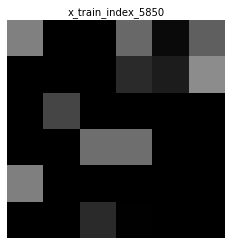

In [148]:
convert_to_img(x_train, 'x_train', y_train)

In [149]:
convert_to_img(x_test, 'x_test', y_test)


  0%|          | 0/80057 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 4/80057 [00:00<39:40, 33.63it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 8/80057 [00:00<40:39, 32.82it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 11/80057 [00:00<45:51, 29.10it/s]Clipping input data to the valid rang


  0%|          | 93/80057 [00:13<5:38:09,  3.94it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 94/80057 [00:14<5:34:00,  3.99it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 96/80057 [00:14<5:46:14,  3.85it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 102/80057 [00:16<6:42:29,  3.31it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 104/80057 [00:17<6:48:36,  3.26it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 106/80057 [00:17<7:04:13,  3.14it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 1

  0%|          | 249/80057 [01:27<14:20:17,  1.55it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 251/80057 [01:29<14:55:37,  1.49it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 252/80057 [01:29<14:47:33,  1.50it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 253/80057 [01:30<14:42:00,  1.51it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 254/80057 [01:31<14:37:37,  1.52it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 256/80057 [01:32<15:43:20,  1.41it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|     

  0%|          | 389/80057 [03:26<21:59:36,  1.01it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 395/80057 [03:33<23:41:35,  1.07s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 398/80057 [03:36<23:42:51,  1.07s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 399/80057 [03:37<23:18:51,  1.05s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  0%|          | 400/80057 [03:38<24:16:41,  1.10s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 401/80057 [03:39<23:41:59,  1.07s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|     


  1%|          | 460/80057 [04:42<24:19:26,  1.10s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 461/80057 [04:43<24:26:27,  1.11s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 463/80057 [04:46<25:46:56,  1.17s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 468/80057 [04:52<27:49:57,  1.26s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 479/80057 [05:07<28:53:27,  1.31s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 481/80057 [05:09<29:15:08,  1.32s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|    


  1%|          | 625/80057 [12:20<75:46:42,  3.43s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 627/80057 [12:27<80:30:30,  3.65s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 630/80057 [12:38<80:04:36,  3.63s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 632/80057 [12:45<76:49:44,  3.48s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 638/80057 [13:05<72:51:37,  3.30s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 639/80057 [13:08<73:23:56,  3.33s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|    

  1%|          | 770/80057 [21:08<86:19:44,  3.92s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 772/80057 [21:15<85:28:48,  3.88s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 774/80057 [21:24<88:28:19,  4.02s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 776/80057 [21:32<88:47:00,  4.03s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 779/80057 [21:44<90:28:41,  4.11s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 780/80057 [21:49<90:32:55,  4.11s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|     


  1%|          | 837/80057 [25:51<96:55:32,  4.40s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 839/80057 [26:00<101:02:11,  4.59s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 841/80057 [26:10<104:49:51,  4.76s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 844/80057 [26:24<102:39:50,  4.67s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 847/80057 [26:39<107:22:01,  4.88s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 849/80057 [26:49<107:51:35,  4.90s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%


  1%|          | 980/80057 [2:09:23<210:37:39,  9.59s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 981/80057 [2:09:33<207:29:31,  9.45s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 984/80057 [2:10:00<206:57:07,  9.42s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 985/80057 [2:10:11<211:49:15,  9.64s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 986/80057 [2:10:20<211:35:29,  9.63s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|          | 989/80057 [2:10:47<201:47:39,  9.19s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for int


  1%|▏         | 1055/80057 [2:20:31<146:23:37,  6.67s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|▏         | 1058/80057 [2:20:50<140:47:38,  6.42s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|▏         | 1059/80057 [2:20:57<142:31:40,  6.50s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|▏         | 1060/80057 [2:21:04<144:32:59,  6.59s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|▏         | 1061/80057 [2:21:11<147:34:37,  6.73s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  1%|▏         | 1064/80057 [2:21:31<146:58:45,  6.70s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] f

  1%|▏         | 1196/80057 [6:58:58<81:07:20,  3.70s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1201/80057 [6:59:15<75:11:12,  3.43s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1203/80057 [6:59:22<74:15:12,  3.39s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1204/80057 [6:59:25<74:26:31,  3.40s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1205/80057 [6:59:28<74:33:42,  3.40s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1206/80057 [6:59:32<74:39:00,  3.41s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for inte


  2%|▏         | 1265/80057 [7:03:05<81:29:09,  3.72s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1266/80057 [7:03:09<81:49:56,  3.74s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1267/80057 [7:03:13<81:27:49,  3.72s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1268/80057 [7:03:16<80:28:53,  3.68s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1269/80057 [7:03:20<79:15:38,  3.62s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1274/80057 [7:03:37<77:23:34,  3.54s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for int


  2%|▏         | 1410/80057 [7:14:20<111:52:53,  5.12s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1413/80057 [7:14:35<110:11:43,  5.04s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1414/80057 [7:14:40<111:22:59,  5.10s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1415/80057 [7:14:45<109:45:29,  5.02s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1416/80057 [7:14:50<109:19:39,  5.00s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1420/80057 [7:15:11<112:11:33,  5.14s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] f


  2%|▏         | 1480/80057 [7:20:32<115:28:27,  5.29s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1484/80057 [7:20:55<119:36:04,  5.48s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1487/80057 [7:21:11<116:58:04,  5.36s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1488/80057 [7:21:16<117:52:15,  5.40s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1494/80057 [7:21:50<120:11:32,  5.51s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1495/80057 [7:21:55<118:34:47,  5.43s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] f


  2%|▏         | 1629/80057 [7:34:14<107:29:06,  4.93s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1631/80057 [7:34:23<99:35:26,  4.57s/it] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1633/80057 [7:34:31<97:14:56,  4.46s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1635/80057 [7:34:40<97:29:48,  4.48s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1636/80057 [7:34:45<98:23:44,  4.52s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1637/80057 [7:34:50<100:53:13,  4.63s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for 


  2%|▏         | 1702/80057 [7:39:37<92:08:38,  4.23s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1703/80057 [7:39:41<91:44:11,  4.21s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1704/80057 [7:39:46<96:34:50,  4.44s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1706/80057 [7:39:55<97:54:02,  4.50s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1707/80057 [7:40:00<100:05:47,  4.60s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1710/80057 [7:40:13<95:01:45,  4.37s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for in


  2%|▏         | 1765/80057 [7:44:45<122:24:18,  5.63s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1767/80057 [7:44:57<123:40:53,  5.69s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1769/80057 [7:45:08<122:29:15,  5.63s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1772/80057 [7:45:25<122:59:02,  5.66s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1773/80057 [7:45:31<122:39:29,  5.64s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1774/80057 [7:45:36<122:30:53,  5.63s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] f

  2%|▏         | 1918/80057 [8:25:17<3700:23:30, 170.48s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1919/80057 [8:25:22<2623:32:02, 120.87s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1921/80057 [8:25:33<1347:41:34, 62.09s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1922/80057 [8:25:38<978:05:38, 45.06s/it] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1926/80057 [8:26:00<323:49:16, 14.92s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1927/80057 [8:26:06<267:24:56, 12.32s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..2


  2%|▏         | 1992/80057 [8:31:34<106:14:01,  4.90s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1993/80057 [8:31:39<106:28:40,  4.91s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1998/80057 [8:32:06<114:13:24,  5.27s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 1999/80057 [8:32:12<114:37:04,  5.29s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  2%|▏         | 2001/80057 [8:32:22<113:23:32,  5.23s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  3%|▎         | 2002/80057 [8:32:27<111:21:34,  5.14s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] f


  3%|▎         | 2062/80057 [8:38:06<123:35:50,  5.70s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  3%|▎         | 2064/80057 [8:38:17<121:55:14,  5.63s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  3%|▎         | 2066/80057 [8:38:28<121:27:58,  5.61s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  3%|▎         | 2068/80057 [8:38:40<122:37:33,  5.66s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  3%|▎         | 2070/80057 [8:38:51<125:04:20,  5.77s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  3%|▎         | 2071/80057 [8:38:58<128:52:04,  5.95s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] f

  3%|▎         | 2203/80057 [8:51:10<122:49:03,  5.68s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  3%|▎         | 2204/80057 [8:51:15<119:21:44,  5.52s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  3%|▎         | 2205/80057 [8:51:20<116:58:39,  5.41s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  3%|▎         | 2208/80057 [8:51:35<114:24:09,  5.29s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  3%|▎         | 2209/80057 [8:51:41<118:32:07,  5.48s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

  3%|▎         | 2210/80057 [8:51:47<118:55:11,  5.50s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] fo

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f99dd6ea320> (for post_execute):


KeyboardInterrupt: 